In [28]:
%pylab inline

import glob
import matplotlib

import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import random
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


In [29]:
def main():
    
    per = 2
    means = [10**-5, 10**-4, 10**-3, 10**-2]
    final_file_list = []
    for mean in means:
        file_list = glob.glob('./results/validation/single_sim/per_%d*_%.5f.txt'%(per, mean)) # narrow_prior 
        file = random.choice(file_list)
        final_file_list.append(file)
    #file_list = glob.glob('./results/validation/single_sim/*423.txt') 
    #file_list = glob.glob('./results/validation/*2000_validation.txt') 
    #file_list = glob.glob('./results/validation/0710/*n_524.txt') 
    string = 'Gamma probability distribution functions'
    save = 'gamma_pdfs'
    final_file_list = final_file_list[0:1]
    color_dic = {}
    color_list = ['red','orange','green','blue','purple','black']
    for i in range(0, len(final_file_list)): 
        color_dic[final_file_list[i]] = color_list[i]
    
    
    #num_sims = 5000
    fig, ax = plt.subplots(figsize=(10, 5))
    #buckets = [0, 10**-5, 10**-4, 10**-3, 10**-2, 1]
    #x = np.linspace(0, 1, 100000) #1E-6
    #fig, ax = plt.subplots(figsize=(5, 3.75))
    
    for inFile in final_file_list:
        allele_freqs_file = open(inFile, 'r')
        lines = allele_freqs_file.readlines()
   
        line = lines[1]       
        info = line.strip().split(' ')
        act_k = float(info[7])
        act_theta = float(info[10])
        
        #line= lines[11] ### CHANGE THIS TO CHANGE ESTIMATION OF K, THETA
        #info = line.strip().split(',')
        #k = float(info[0])
        #theta = float(info[1])
        
        #dist = gamma(k, 0, theta)
    
        #plt.plot(x, dist.pdf(x), ls='dashed', c=color_dic[inFile],
             #label=r'$k=%.4f,\ \theta=%.4f$' % (k, theta))
        #plt.axvline(x=k*theta, color=color_dic[inFile], linestyle = 'dashed')
        
        #motif = 'k_' +str(round(k,4)) + '_theta_' + str(round(theta,4))
        #n, bins, patches = ax.hist(s_vals, bins=buckets, density=True, histtype='step',
                                   #cumulative=True, label='est_'+motif, color=color_dic[inFile], linestyle = 'dashed', linewidth = 2) # histtype='step',
        
        num_sims = 10000
        s = []
        for i in range(0, num_sims):
            s_val = np.random.gamma(act_k, act_theta)
            if s_val > 1:
                s_val = 1
        
            s.append(s_val)
        
        plt.hist(s, density=True, bins=[0,10**-5,10**-4,10**-3,10**-2,10**-1,1], label="Data")
        mn, mx = plt.xlim()
        plt.xlim(mn, mx)
        kde_xs = np.linspace(mn, mx, 301)
        kde = st.gaussian_kde(s)
        plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
        plt.legend(loc="upper left")
        plt.ylabel('Probability')
        plt.xlabel('Data')
        plt.title("Histogram")
        plt.xscale('log')

        #dist = gamma(act_k, 0, act_theta)
    
        #plt.plot(x, dist.pdf(x), c=color_dic[inFile], label=r'$k=%.5f,\ \theta=%.5f$' % (act_k, act_theta))
        #plt.axvline(x=act_k*act_theta, ls='dashed',color=color_dic[inFile])
        #motif = 'k_'+str(round(act_k,4)) + '_theta_' + str(round(act_theta,4))
        #n, bins, patches = ax.hist(s_vals, bins=buckets, density=True, histtype='step',
                                   #cumulative=True, label='act_' + motif, color=color_dic[inFile]) 
    #plt.xlim(0, 0.4)
    #plt.ylim(0, 0.3)
    
    #plt.xlabel('s')
    #plt.ylabel(r'$p(x|k,\theta)$')
    # Label figure
    #plt.legend(loc='best')
    #plt.title(string)
    #ax.set_xlabel('s',size=15)
    #plt.xscale('log')
    #ax.set_ylabel('Fraction of s',size=15)
    #plt.xticks(fontsize=15) 
    #plt.yticks(fontsize=15)
    #plt.savefig('/storage/BonnieH/selection_project/joint_method/figures/' + save + '.pdf',bbox_inches='tight')

CPU times: user 1.41 s, sys: 83.3 ms, total: 1.49 s
Wall time: 1.59 s


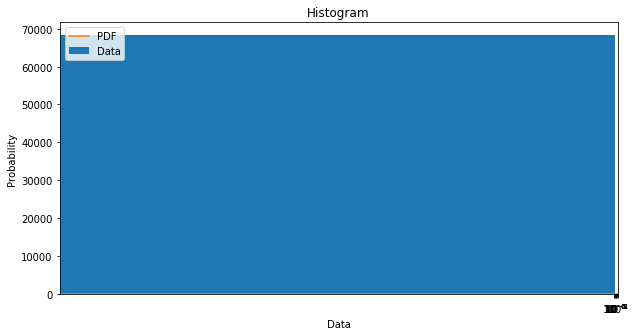

In [30]:
%%time
if __name__ == '__main__':
    main()